In [1]:
import random
import os
import glob
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import keras 
import gzip
import pickle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime

os.chdir('../../functions/')
from models import get_class_weight, preprocessor, plot_confusion_matrix, compile_image_model, \
                    CNN_model,label_dict, revlabel_dict, recreate_labels, map_path_to_augmented


from preprocessing import create_data_set, randomize


## Explore models with two sizes of kernels (3 and 7 pixels)
### CNN network example below for 10 3x3 kernels and 14 7x7 kernels

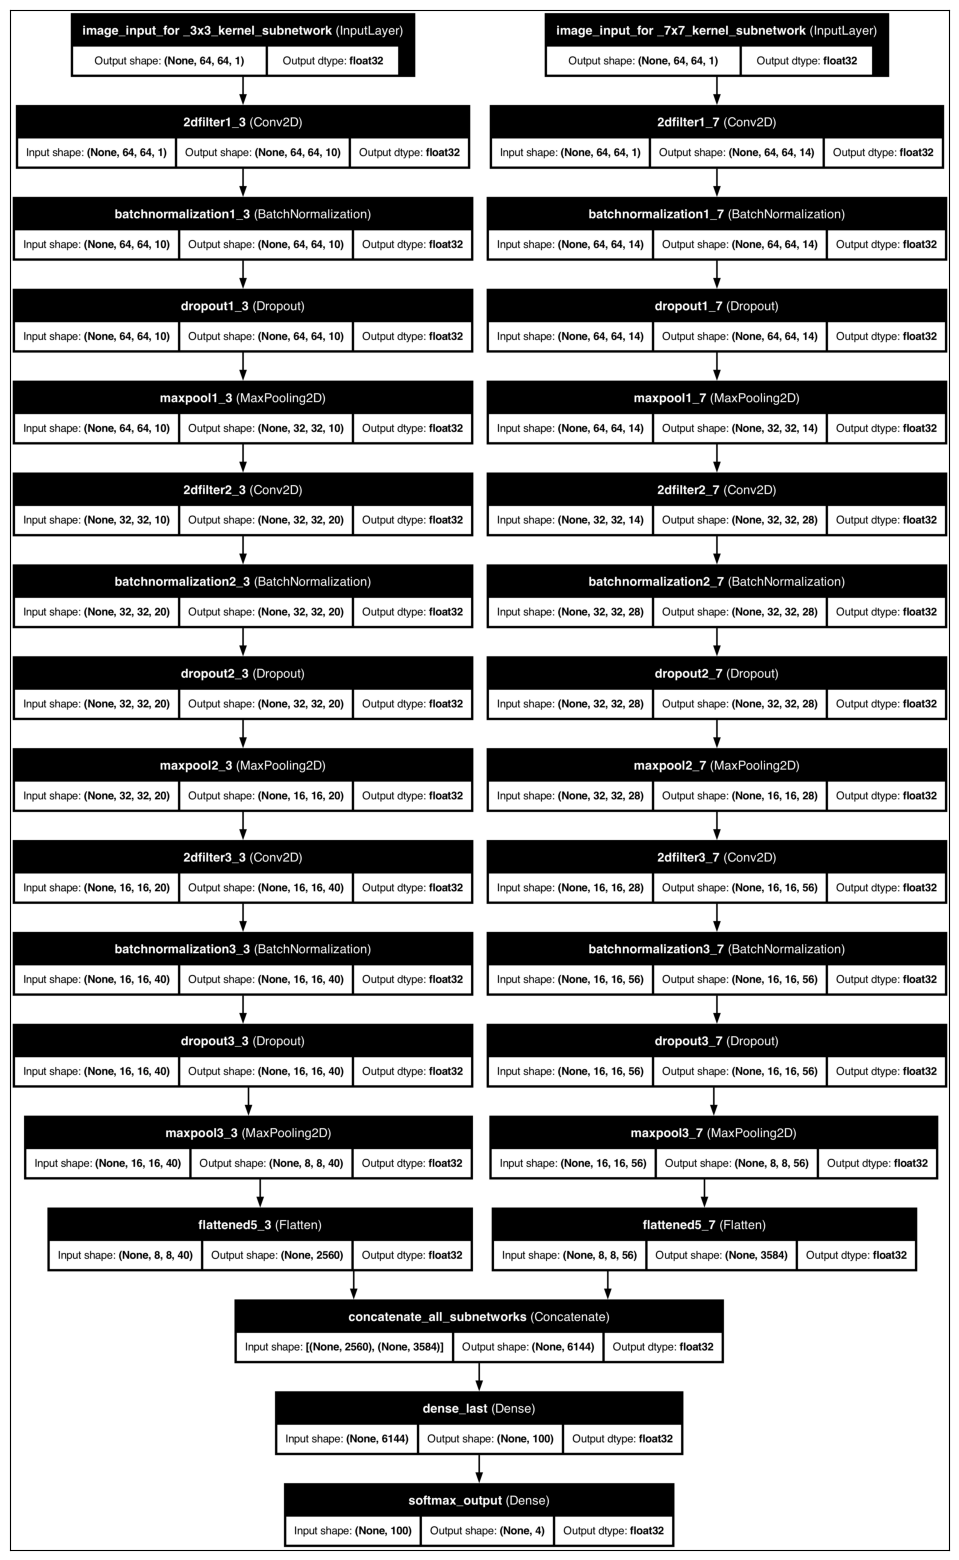

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../images/introduction/schematic_model_with_2_kernelsizes.png')
plt.figure(figsize = (15,20))
plt.imshow(img)
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.show()

## Data set creation

In [2]:
DATA_DIR = "../../archive-2/"
large_labels = ["hole", "thread_error", "objects", "oil_spot"]

#walk all the files and add them to this
all_files = [filename for filename in glob.glob(DATA_DIR + "//*//*")]
all_files = [filename for filename in all_files if 'good' not in filename and 'tilda' not in filename 
             and filename.split("/")[3] in large_labels]

#shuffle
random.shuffle(all_files)

#get class names
all_labels = [filename.split("/")[-2] for filename in all_files]
all_labels_numerical = [revlabel_dict[filename.split("/")[-2]] for filename in all_files]


In [3]:
features_train_defect_array, features_eval_defect_array, \
features_test_defect_array, labels_defect_train, \
labels_defect_eval, labels_defect_test = create_data_set(all_files, all_labels_numerical, 
                                                         label_dict, revlabel_dict, 
                                                         target_samples_per_class_train = 10240, 
                                                         target_samples_per_class_eval = 1024, 
                                                         label_code=1, random_state=102)

1944 243 243
1944 243 243
unique_labels {'hole', 'oil_spot', 'objects', 'thread_error'}
unique_labels {'hole', 'oil_spot', 'objects', 'thread_error'}
40868 4094 243
len(features_train_array): 40868
features_train_array.shape: (40868, 64, 64, 3)
features_test_array.shape: (243, 64, 64, 3)
features_train_array.shape: (40868, 64, 64, 1)
features_test_array.shape: (243, 64, 64, 1)


In [4]:
class_weights = get_class_weight(list(labels_defect_train))

9.950248756218905e-05
9.782821365681862e-05
9.823182711198428e-05
9.600614439324117e-05


In [5]:
labels_defect_train = np.array(labels_defect_train)
labels_defect_eval = np.array(labels_defect_eval)
labels_defect_test = np.array(labels_defect_test)

## Turn on if data needs to be saved or recall

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
# Turn on if data needs to be saved or recall
# today = '2024-10-09'
# with gzip.open(f"../data/models/defect_identification/datasets/labels_defect_train.pckl", 'rb') as f:
#     labels_defect_train = pickle.load( f)
# with gzip.open(f"../data/models/defect_identification/datasets/labels_defect_eval_{today}.pckl", 'rb') as f:
#     labels_defect_eval = pickle.load(f)
# with gzip.open(f"../data/models/defect_identification/datasets/labels_defect_test_{today}.pckl", 'rb') as f:
#     labels_defect_test = pickle.load(f)
# with gzip.open(f"../data/models/defect_identification/datasets/features_train_defect_array_{today}.pckl", 'rb') as f:
#     features_train_defect_array = pickle.load(f)
# with gzip.open(f"../data/models/defect_identification/datasets/features_eval_defect_array_{today}.pckl", 'rb') as f:
#     features_eval_defect_array = pickle.load(f)
# with gzip.open(f"../data/models/defect_identification/datasets/features_test_defect_array_{today}.pckl", 'rb') as f:
#     features_test_defect_array = pickle.load(f)

NEW MODEL
kernel dim = 3x3 number kernels = 12, 7x7 number kernels = 6
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64, 6) │        300 │ image_input_for   │
│ (Conv2D)            │                   │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 6) │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64, 6) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32, 6) │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │      3,540 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                 

 Total params: 493,328 (1.88 MB)

 Trainable params: 492,880 (1.88 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 54s 329ms/step - accuracy: 0.2800 - loss: 1.9850e-04 - val_accuracy: 0.2433 - val_loss: 3.0060
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 60s 377ms/step - accuracy: 0.3170 - loss: 1.3056e-04 - val_accuracy: 0.2433 - val_loss: 3.5567
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 353ms/step - accuracy: 0.3346 - loss: 1.2909e-04 - val_accuracy: 0.2433 - val_loss: 2.5422
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 358ms/step - accuracy: 0.3459 - loss: 1.2665e-04 - val_accuracy: 0.2469 - val_loss: 3.8660
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 54s 340ms/step - accuracy: 0.4250 - loss: 1.1458e-04 - val_accuracy: 0.2362 - val_loss: 3.3536
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 345ms/step - accuracy: 0.6550 - loss: 7.6289e-05 - val_accuracy: 0.2577 - val_loss: 4.0918
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 341ms/step - accuracy: 0.8236 - loss: 4.1086e-05 - val_accuracy: 0.3092 - val_loss: 4.3207
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64, 6) │        300 │ image_input_for   │
│ (Conv2D)            │                   │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 6) │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64, 6) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32, 6) │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │      3,540 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                 

 Total params: 1,479,090 (5.64 MB)

 Trainable params: 492,880 (1.88 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 985,762 (3.76 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Finished predicting X with eval data set.

[[360 180 210 270]
 [ 48 636 240  72]
 [  0 192 720 112]
 [ 68 187 255 544]]
sum of diagonal = 2260


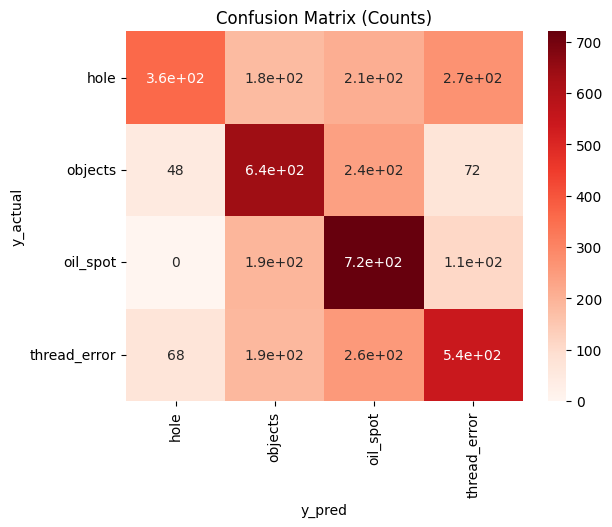


[[0.08793356 0.04396678 0.05129458 0.06595017]
 [0.01172447 0.15534929 0.05862237 0.01758671]
 [0.         0.0468979  0.17586712 0.02735711]
 [0.01660967 0.0456766  0.06228627 0.13287738]]
sum of diagonal = 0.5520273571079628


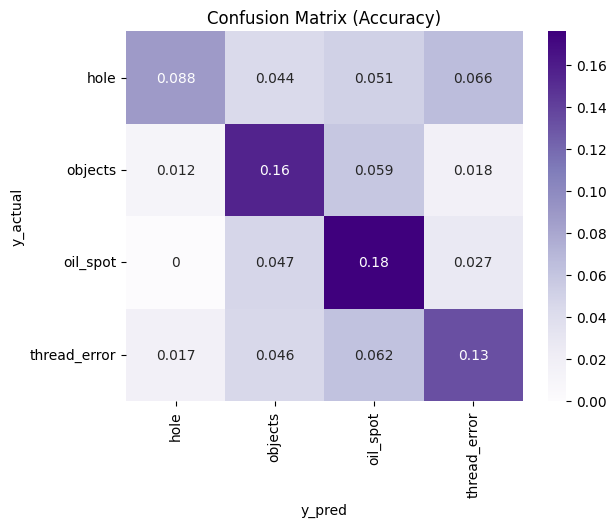


[[0.75630252 0.15062762 0.14736842 0.27054108]
 [0.10084034 0.53221757 0.16842105 0.07214429]
 [0.         0.16066946 0.50526316 0.11222445]
 [0.14285714 0.15648536 0.17894737 0.54509018]]
sum of diagonal = 2.338873432485619


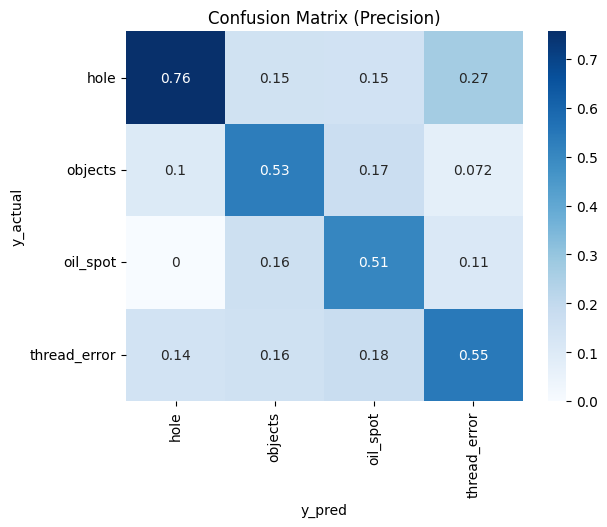


[[0.35294118 0.17647059 0.20588235 0.26470588]
 [0.04819277 0.63855422 0.24096386 0.07228916]
 [0.         0.1875     0.703125   0.109375  ]
 [0.06451613 0.17741935 0.24193548 0.51612903]]
sum of diagonal = 2.2107494255961226


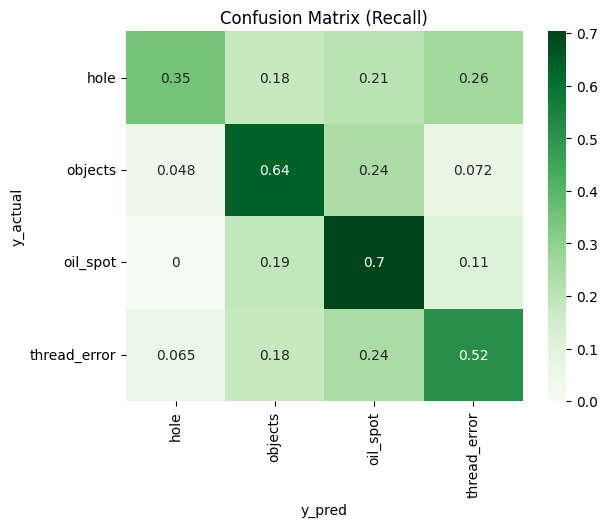

kernel dim = 3x3 number filter = 12, 7x7 number filter = 6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Finished predicting X.

[[15  5  4 10]
 [ 0 58 21  5]
 [ 0 13 47  3]
 [ 7 12 19 24]]
sum of diagonal = 144


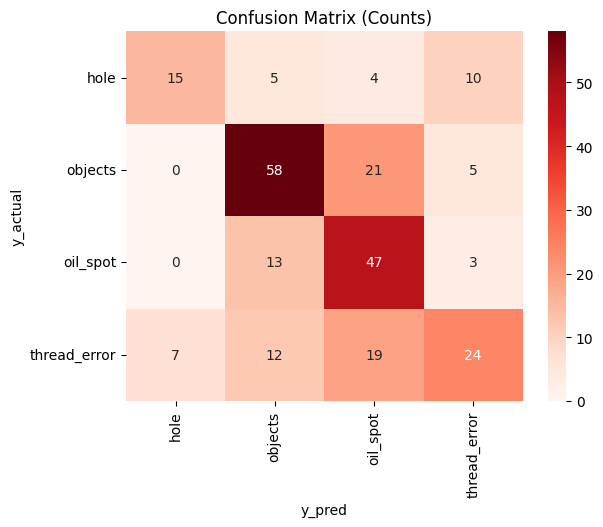


[[0.0617284  0.02057613 0.01646091 0.04115226]
 [0.         0.23868313 0.08641975 0.02057613]
 [0.         0.05349794 0.19341564 0.01234568]
 [0.02880658 0.04938272 0.0781893  0.09876543]]
sum of diagonal = 0.5925925925925926


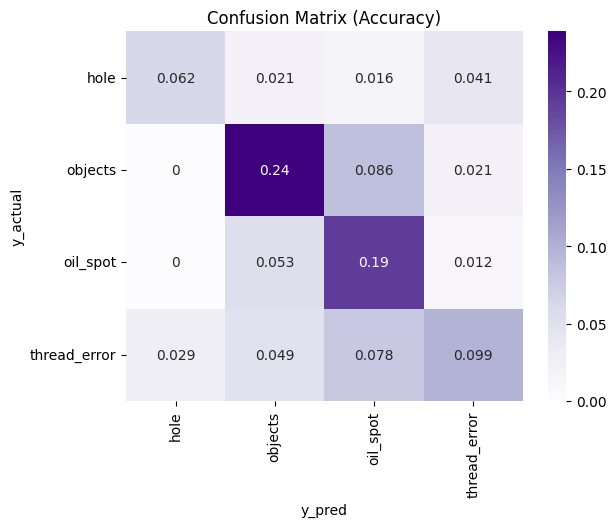


[[0.68181818 0.05681818 0.04395604 0.23809524]
 [0.         0.65909091 0.23076923 0.11904762]
 [0.         0.14772727 0.51648352 0.07142857]
 [0.31818182 0.13636364 0.20879121 0.57142857]]
sum of diagonal = 2.4288211788211784


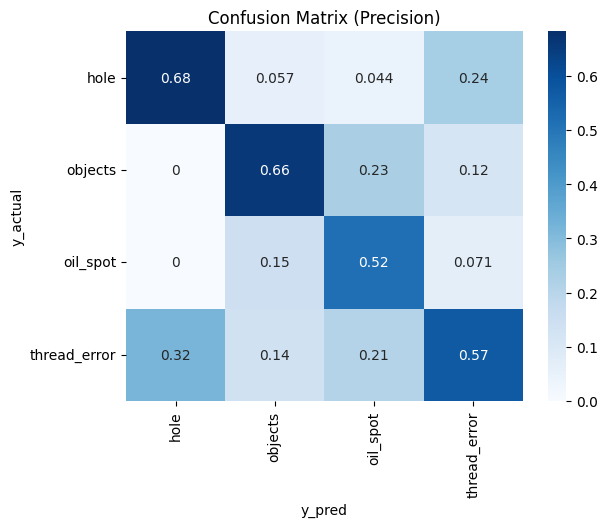


[[0.44117647 0.14705882 0.11764706 0.29411765]
 [0.         0.69047619 0.25       0.05952381]
 [0.         0.20634921 0.74603175 0.04761905]
 [0.11290323 0.19354839 0.30645161 0.38709677]]
sum of diagonal = 2.2647811812897203


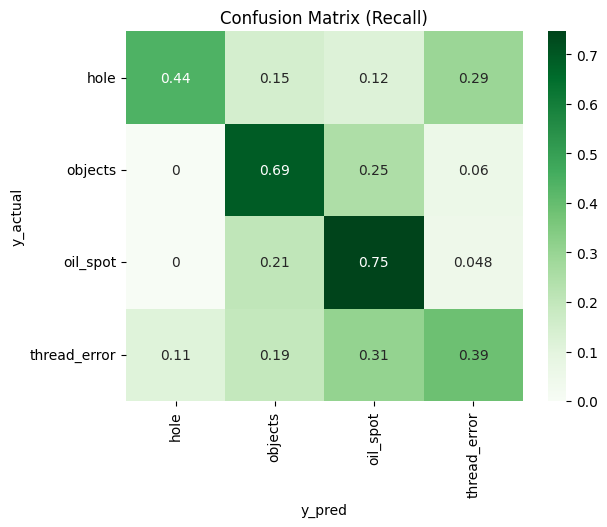

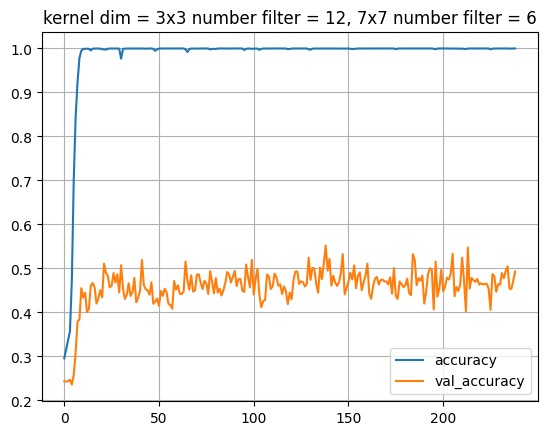

NEW MODEL
kernel dim = 3x3 number kernels = 12, 7x7 number kernels = 8
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64, 8) │        400 │ image_input_for   │
│ (Conv2D)            │                   │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 8) │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32, 8) │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │      6,288 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                 

 Total params: 558,360 (2.13 MB)

 Trainable params: 557,912 (2.13 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 69s 423ms/step - accuracy: 0.2711 - loss: 1.7789e-04 - val_accuracy: 0.2799 - val_loss: 1.7776
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 72s 449ms/step - accuracy: 0.3114 - loss: 1.3305e-04 - val_accuracy: 0.2687 - val_loss: 1.8110
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 65s 406ms/step - accuracy: 0.3745 - loss: 1.2600e-04 - val_accuracy: 0.2697 - val_loss: 2.1115
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 60s 375ms/step - accuracy: 0.4861 - loss: 1.1084e-04 - val_accuracy: 0.2870 - val_loss: 2.2776
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 60s 372ms/step - accuracy: 0.6383 - loss: 8.3442e-05 - val_accuracy: 0.2506 - val_loss: 2.6917
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 371ms/step - accuracy: 0.7781 - loss: 5.4020e-05 - val_accuracy: 0.3339 - val_loss: 2.5769
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 370ms/step - accuracy: 0.8707 - loss: 3.3460e-05 - val_accuracy: 0.3886 - val_loss: 3.2996
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64, 8) │        400 │ image_input_for   │
│ (Conv2D)            │                   │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 8) │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32, 8) │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │      6,288 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                 

 Total params: 1,674,186 (6.39 MB)

 Trainable params: 557,912 (2.13 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,115,826 (4.26 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Finished predicting X with eval data set.

[[540 180  90 210]
 [ 60 744  84 108]
 [ 32 256 560 176]
 [ 85 204 119 646]]
sum of diagonal = 2490


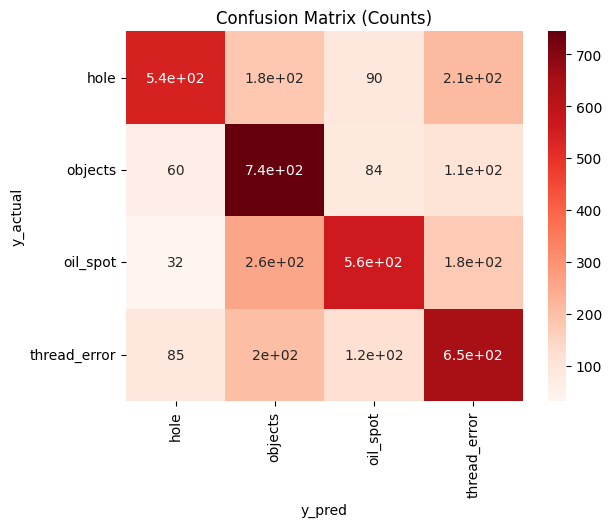


[[0.13190034 0.04396678 0.02198339 0.05129458]
 [0.01465559 0.18172936 0.02051783 0.02638007]
 [0.00781632 0.06253053 0.13678554 0.04298974]
 [0.02076209 0.04982902 0.02906693 0.15779189]]
sum of diagonal = 0.6082071323888617


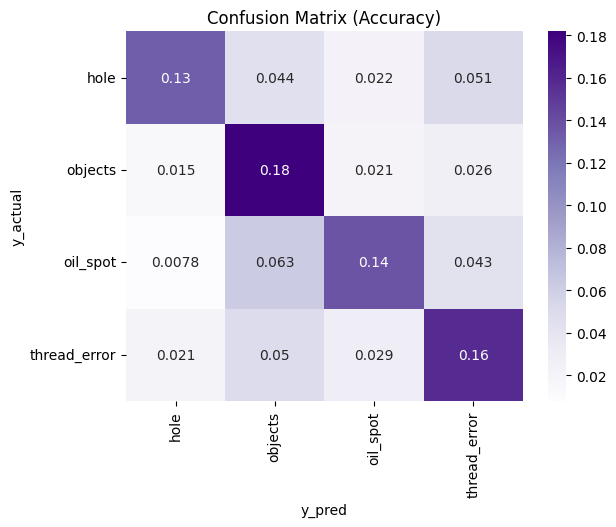


[[0.75313808 0.1300578  0.10550996 0.18421053]
 [0.08368201 0.53757225 0.09847597 0.09473684]
 [0.0446304  0.1849711  0.65650645 0.15438596]
 [0.11854951 0.14739884 0.13950762 0.56666667]]
sum of diagonal = 2.5138834441469182


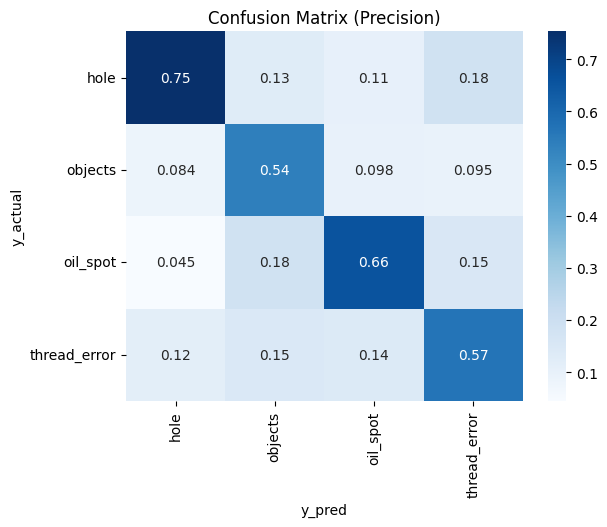


[[0.52941176 0.17647059 0.08823529 0.20588235]
 [0.06024096 0.74698795 0.08433735 0.10843373]
 [0.03125    0.25       0.546875   0.171875  ]
 [0.08064516 0.19354839 0.11290323 0.61290323]]
sum of diagonal = 2.4361779423195626


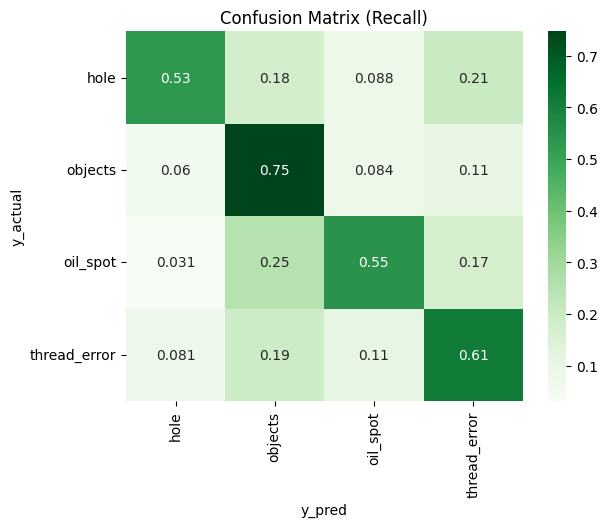

kernel dim = 3x3 number filter = 12, 7x7 number filter = 8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Finished predicting X.

[[16  4  5  9]
 [ 1 59 10 14]
 [ 1 15 36 11]
 [ 7 10 10 35]]
sum of diagonal = 146


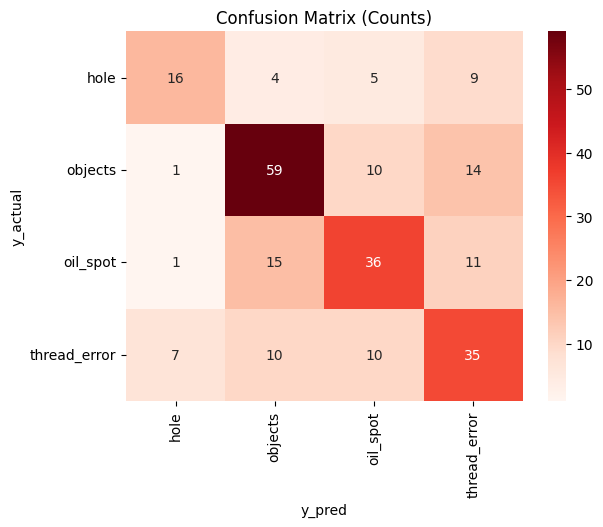


[[0.06584362 0.01646091 0.02057613 0.03703704]
 [0.00411523 0.24279835 0.04115226 0.05761317]
 [0.00411523 0.0617284  0.14814815 0.04526749]
 [0.02880658 0.04115226 0.04115226 0.14403292]]
sum of diagonal = 0.6008230452674898


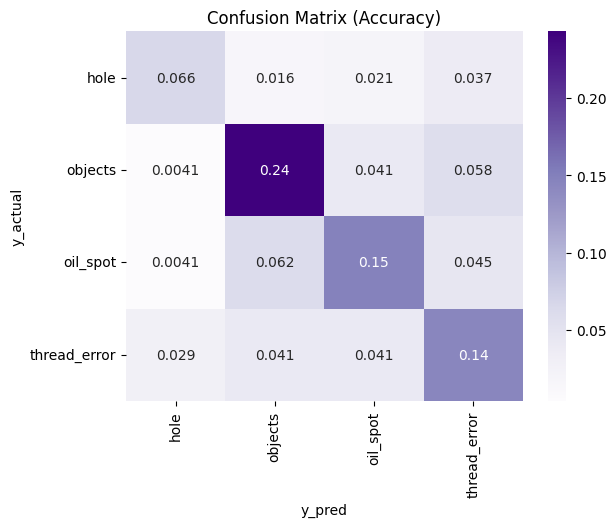


[[0.64       0.04545455 0.08196721 0.13043478]
 [0.04       0.67045455 0.16393443 0.20289855]
 [0.04       0.17045455 0.59016393 0.15942029]
 [0.28       0.11363636 0.16393443 0.50724638]]
sum of diagonal = 2.4078648566923695


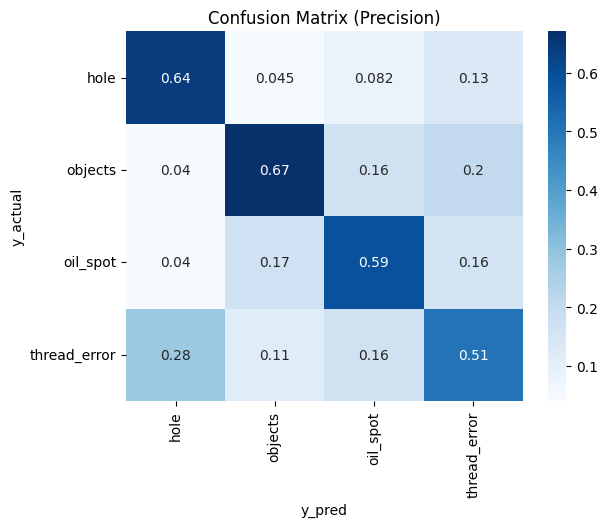


[[0.47058824 0.11764706 0.14705882 0.26470588]
 [0.01190476 0.70238095 0.11904762 0.16666667]
 [0.01587302 0.23809524 0.57142857 0.17460317]
 [0.11290323 0.16129032 0.16129032 0.56451613]]
sum of diagonal = 2.3089138881358995


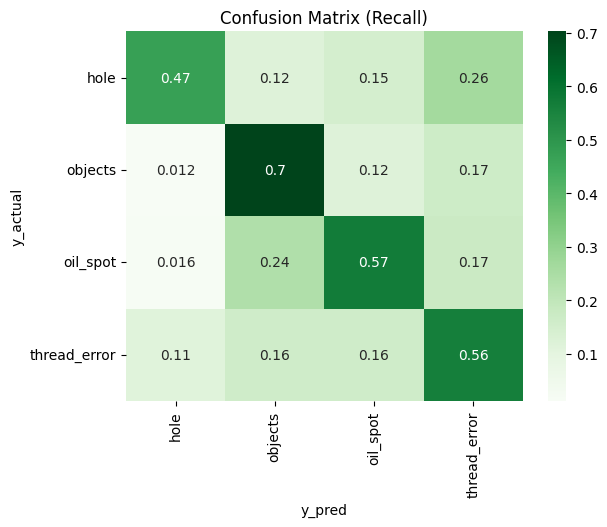

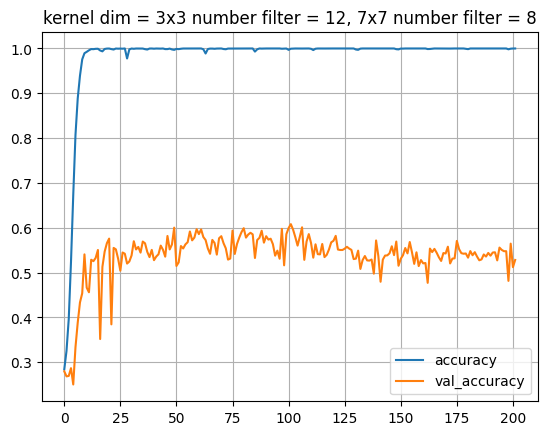

NEW MODEL
kernel dim = 3x3 number kernels = 12, 7x7 number kernels = 10
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        500 │ image_input_for   │
│ (Conv2D)            │ 10)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │      9,820 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 20)               │            │                 

 Total params: 627,312 (2.39 MB)

 Trainable params: 626,864 (2.39 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 68s 419ms/step - accuracy: 0.2820 - loss: 1.7088e-04 - val_accuracy: 0.2574 - val_loss: 1.4803
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 66s 412ms/step - accuracy: 0.3487 - loss: 1.2733e-04 - val_accuracy: 0.2897 - val_loss: 1.9365
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 66s 411ms/step - accuracy: 0.4131 - loss: 1.1567e-04 - val_accuracy: 0.2890 - val_loss: 2.7007
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 66s 412ms/step - accuracy: 0.5400 - loss: 9.8217e-05 - val_accuracy: 0.2853 - val_loss: 2.9261
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 66s 411ms/step - accuracy: 0.7182 - loss: 6.3318e-05 - val_accuracy: 0.3153 - val_loss: 2.6858
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 66s 411ms/step - accuracy: 0.8575 - loss: 3.5094e-05 - val_accuracy: 0.4121 - val_loss: 2.5357
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 66s 412ms/step - accuracy: 0.9445 - loss: 1.6064e-05 - val_accuracy: 0.4670 - val_loss: 2.5336
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        500 │ image_input_for   │
│ (Conv2D)            │ 10)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │      9,820 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 20)               │            │                 

 Total params: 1,881,042 (7.18 MB)

 Trainable params: 626,864 (2.39 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,253,730 (4.78 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Finished predicting X with eval data set.

[[600 180 120 120]
 [ 24 708 144 120]
 [ 32 144 736 112]
 [ 85 272 102 595]]
sum of diagonal = 2639


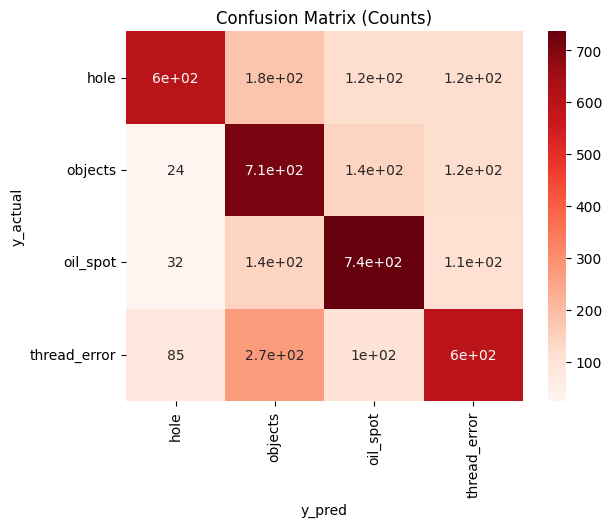


[[0.14655594 0.04396678 0.02931119 0.02931119]
 [0.00586224 0.172936   0.03517342 0.02931119]
 [0.00781632 0.03517342 0.17977528 0.02735711]
 [0.02076209 0.06643869 0.02491451 0.14533464]]
sum of diagonal = 0.6446018563751832


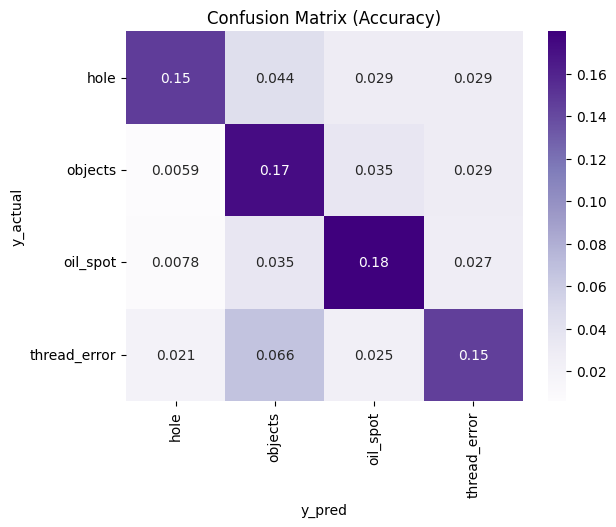


[[0.8097166  0.13803681 0.10889292 0.12671595]
 [0.03238866 0.54294479 0.13067151 0.12671595]
 [0.04318489 0.11042945 0.66787659 0.11826822]
 [0.11470985 0.20858896 0.09255898 0.62829989]]
sum of diagonal = 2.6488378668915145


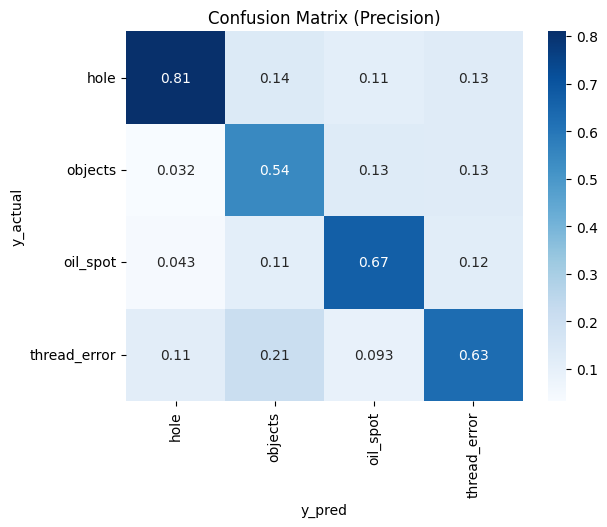


[[0.58823529 0.17647059 0.11764706 0.11764706]
 [0.02409639 0.71084337 0.14457831 0.12048193]
 [0.03125    0.140625   0.71875    0.109375  ]
 [0.08064516 0.25806452 0.09677419 0.56451613]]
sum of diagonal = 2.582344796643881


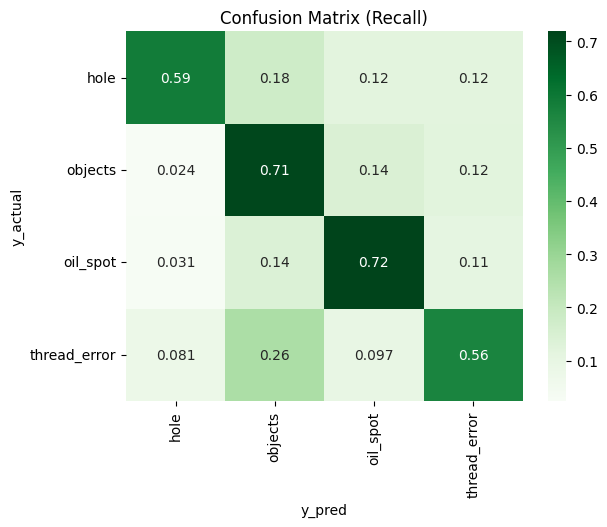

kernel dim = 3x3 number filter = 12, 7x7 number filter = 10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Finished predicting X.

[[21  4  4  5]
 [ 4 59 13  8]
 [ 2 13 43  5]
 [ 6 20 13 23]]
sum of diagonal = 146


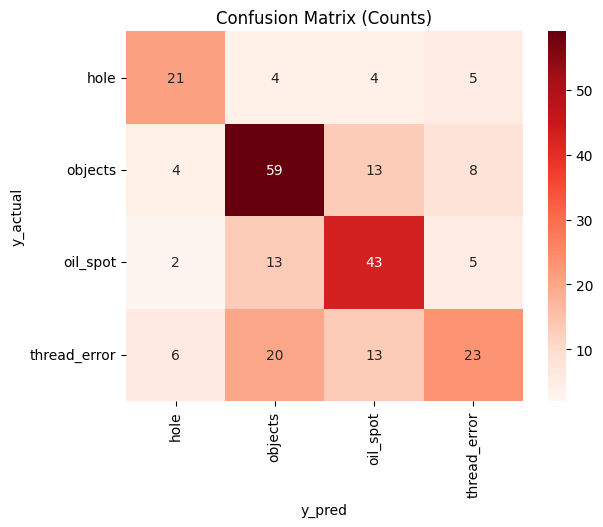


[[0.08641975 0.01646091 0.01646091 0.02057613]
 [0.01646091 0.24279835 0.05349794 0.03292181]
 [0.00823045 0.05349794 0.17695473 0.02057613]
 [0.02469136 0.08230453 0.05349794 0.09465021]]
sum of diagonal = 0.6008230452674898


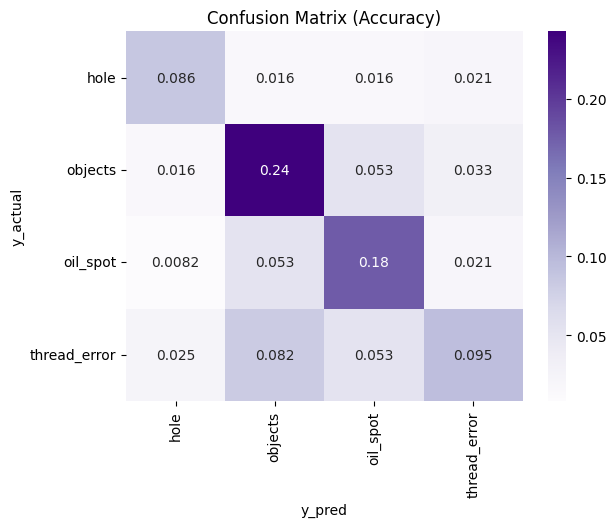


[[0.63636364 0.04166667 0.05479452 0.12195122]
 [0.12121212 0.61458333 0.17808219 0.19512195]
 [0.06060606 0.13541667 0.5890411  0.12195122]
 [0.18181818 0.20833333 0.17808219 0.56097561]]
sum of diagonal = 2.4009636753434784


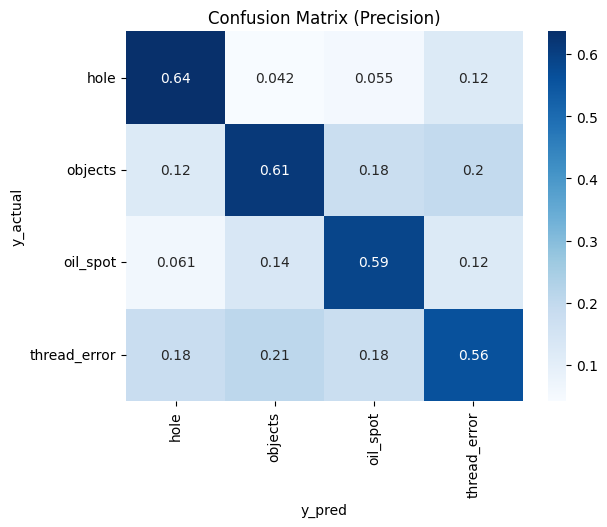


[[0.61764706 0.11764706 0.11764706 0.14705882]
 [0.04761905 0.70238095 0.1547619  0.0952381 ]
 [0.03174603 0.20634921 0.68253968 0.07936508]
 [0.09677419 0.32258065 0.20967742 0.37096774]]
sum of diagonal = 2.3735354356796483


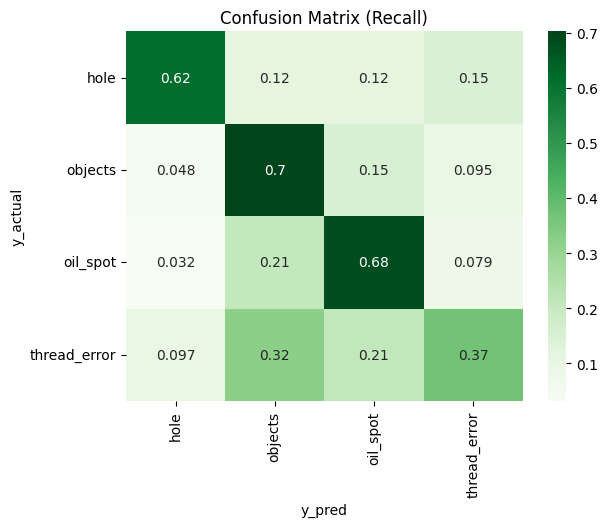

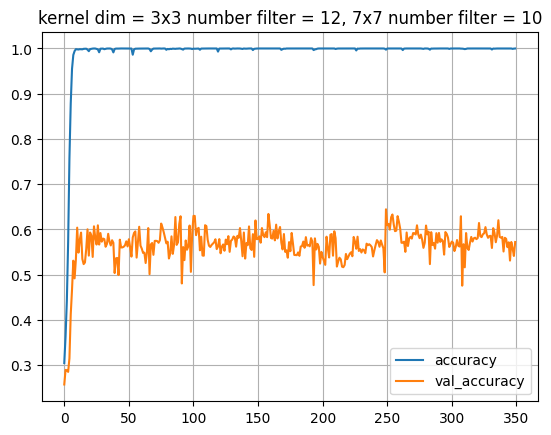

NEW MODEL
kernel dim = 3x3 number kernels = 12, 7x7 number kernels = 12
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 700,184 (2.67 MB)

 Trainable params: 699,736 (2.67 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 79s 484ms/step - accuracy: 0.2708 - loss: 1.8849e-04 - val_accuracy: 0.2418 - val_loss: 2.7432
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 483ms/step - accuracy: 0.3238 - loss: 1.3160e-04 - val_accuracy: 0.2140 - val_loss: 2.2613
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 480ms/step - accuracy: 0.3272 - loss: 1.3023e-04 - val_accuracy: 0.2587 - val_loss: 2.5316
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 76s 478ms/step - accuracy: 0.3293 - loss: 1.2934e-04 - val_accuracy: 0.3202 - val_loss: 2.3395
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 481ms/step - accuracy: 0.3487 - loss: 1.2651e-04 - val_accuracy: 0.1927 - val_loss: 2.1731
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 480ms/step - accuracy: 0.4212 - loss: 1.1375e-04 - val_accuracy: 0.3657 - val_loss: 2.0942
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 480ms/step - accuracy: 0.7243 - loss: 6.3173e-05 - val_accuracy: 0.2929 - val_loss: 5.6696
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 2,099,658 (8.01 MB)

 Trainable params: 699,736 (2.67 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,399,474 (5.34 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Finished predicting X with eval data set.

[[450  90 270 210]
 [ 24 528 252 192]
 [  0 208 656 160]
 [ 68 187 136 663]]
sum of diagonal = 2297


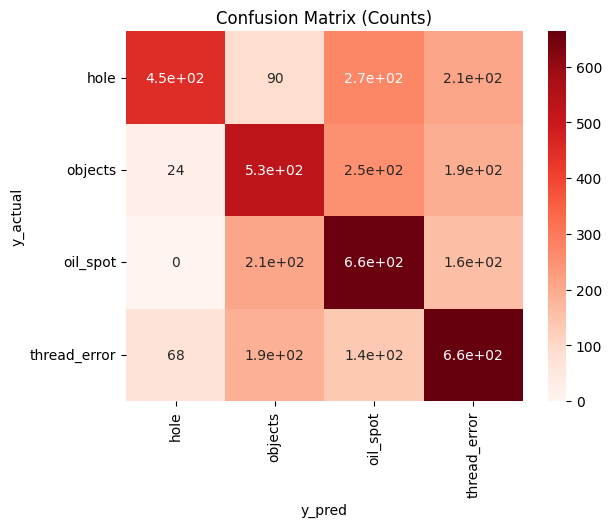


[[0.10991695 0.02198339 0.06595017 0.05129458]
 [0.00586224 0.12896922 0.06155349 0.0468979 ]
 [0.         0.05080606 0.16023449 0.03908158]
 [0.01660967 0.0456766  0.03321935 0.16194431]]
sum of diagonal = 0.5610649731314118


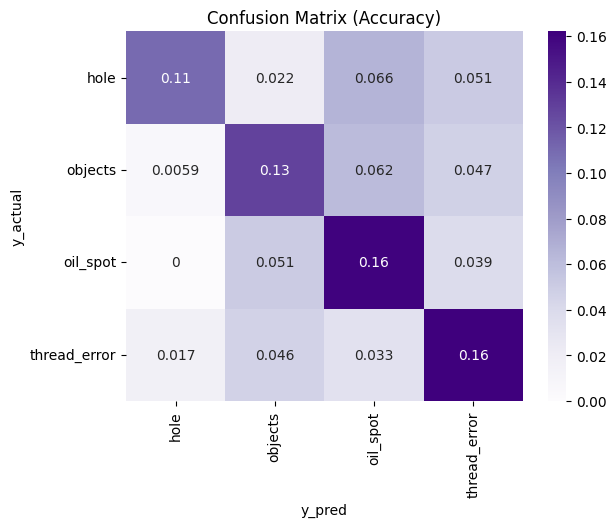


[[0.8302583  0.08884501 0.20547945 0.17142857]
 [0.04428044 0.52122409 0.19178082 0.15673469]
 [0.         0.2053307  0.49923896 0.13061224]
 [0.12546125 0.1846002  0.10350076 0.54122449]]
sum of diagonal = 2.3919458442420147


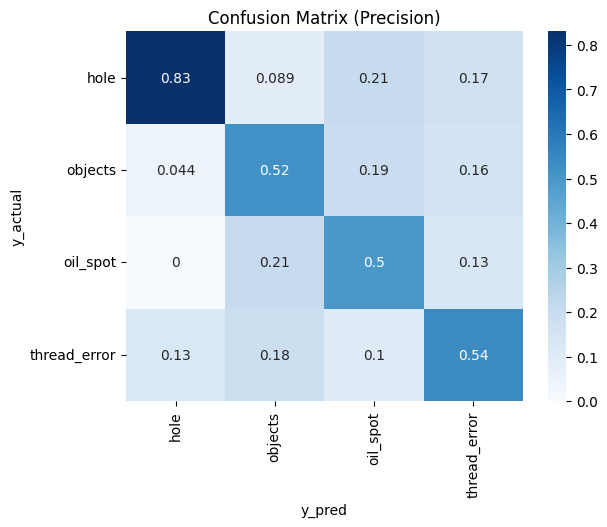


[[0.44117647 0.08823529 0.26470588 0.20588235]
 [0.02409639 0.53012048 0.25301205 0.19277108]
 [0.         0.203125   0.640625   0.15625   ]
 [0.06451613 0.17741935 0.12903226 0.62903226]]
sum of diagonal = 2.2409542105804623


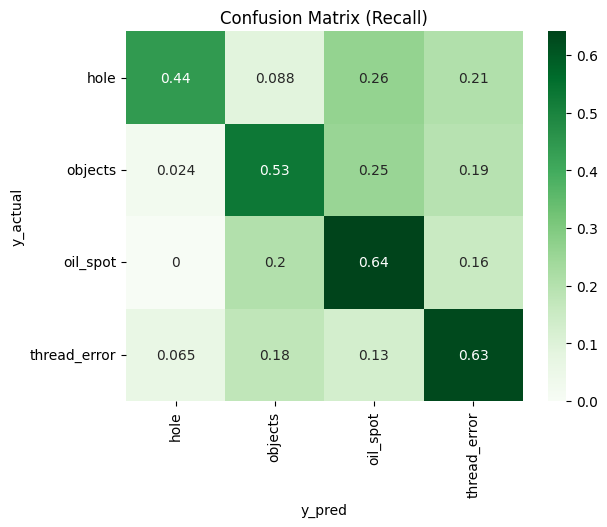

kernel dim = 3x3 number filter = 12, 7x7 number filter = 12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Finished predicting X.

[[14  6  3 11]
 [ 0 52 14 18]
 [ 0 11 40 12]
 [ 6  5 11 40]]
sum of diagonal = 146


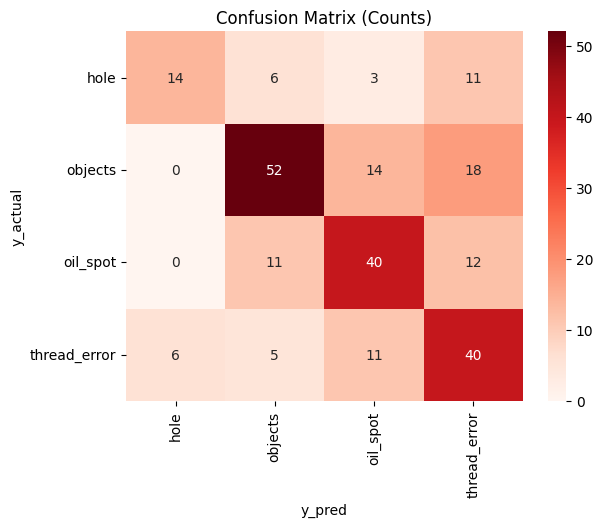


[[0.05761317 0.02469136 0.01234568 0.04526749]
 [0.         0.21399177 0.05761317 0.07407407]
 [0.         0.04526749 0.16460905 0.04938272]
 [0.02469136 0.02057613 0.04526749 0.16460905]]
sum of diagonal = 0.6008230452674898


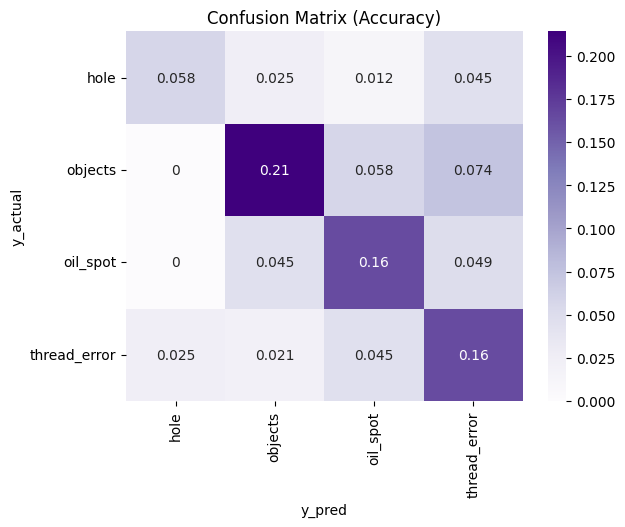


[[0.7        0.08108108 0.04411765 0.13580247]
 [0.         0.7027027  0.20588235 0.22222222]
 [0.         0.14864865 0.58823529 0.14814815]
 [0.3        0.06756757 0.16176471 0.49382716]]
sum of diagonal = 2.484765157314177


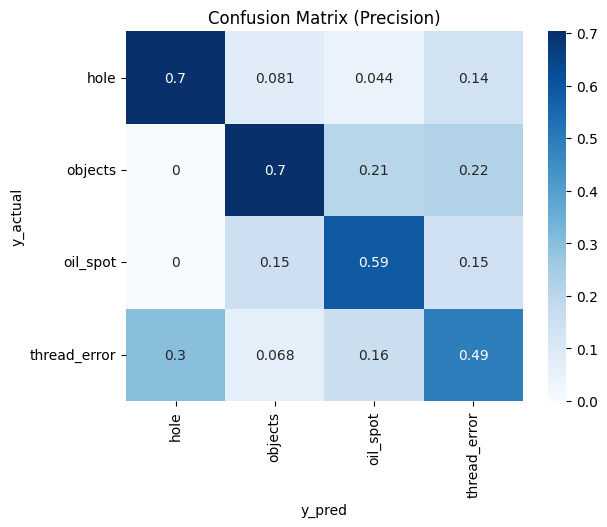


[[0.41176471 0.17647059 0.08823529 0.32352941]
 [0.         0.61904762 0.16666667 0.21428571]
 [0.         0.17460317 0.63492063 0.19047619]
 [0.09677419 0.08064516 0.17741935 0.64516129]]
sum of diagonal = 2.3108942501731873


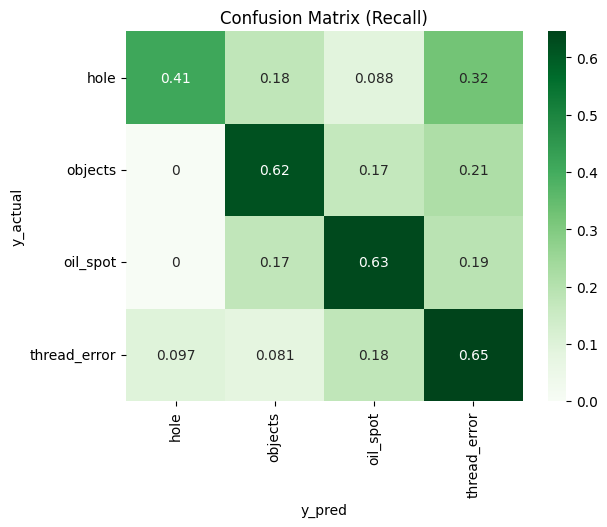

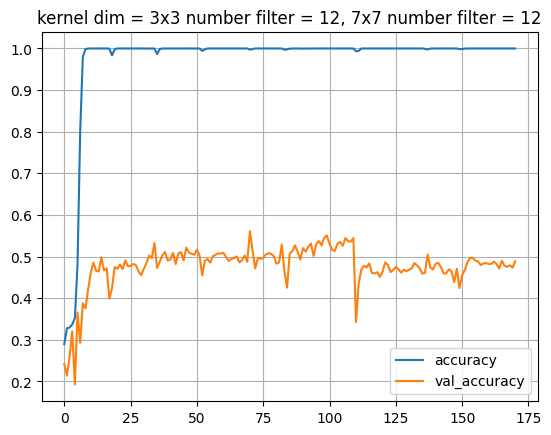

NEW MODEL
kernel dim = 3x3 number kernels = 12, 7x7 number kernels = 14
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 776,976 (2.96 MB)

 Trainable params: 776,528 (2.96 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 95s 588ms/step - accuracy: 0.2886 - loss: 1.9953e-04 - val_accuracy: 0.2574 - val_loss: 7.8383
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 583ms/step - accuracy: 0.3441 - loss: 1.3062e-04 - val_accuracy: 0.2574 - val_loss: 5.9563
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 94s 585ms/step - accuracy: 0.3878 - loss: 1.2129e-04 - val_accuracy: 0.2291 - val_loss: 2.6009
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 584ms/step - accuracy: 0.4921 - loss: 1.0798e-04 - val_accuracy: 0.2323 - val_loss: 2.5276
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 94s 585ms/step - accuracy: 0.5870 - loss: 8.8143e-05 - val_accuracy: 0.2704 - val_loss: 2.7989
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 94s 584ms/step - accuracy: 0.7478 - loss: 5.9296e-05 - val_accuracy: 0.3974 - val_loss: 2.6553
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 94s 585ms/step - accuracy: 0.8781 - loss: 3.1657e-05 - val_accuracy: 0.3652 - val_loss: 3.8102
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 2,330,034 (8.89 MB)

 Trainable params: 776,528 (2.96 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,553,058 (5.92 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Finished predicting X with eval data set.

[[510 120 120 270]
 [ 72 720 132  72]
 [  0 128 848  48]
 [136 255 238 425]]
sum of diagonal = 2503


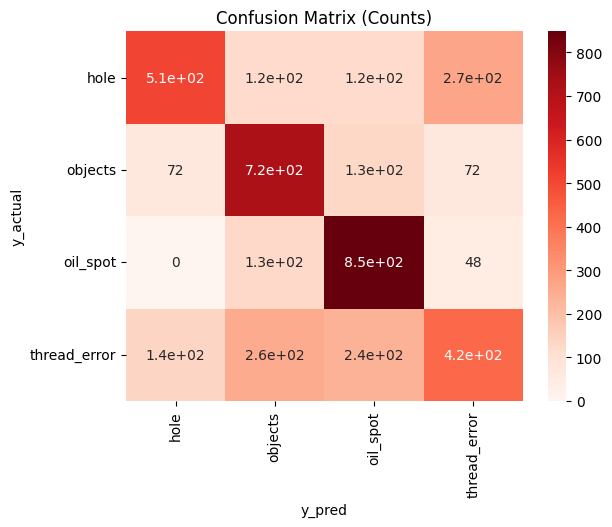


[[0.12457255 0.02931119 0.02931119 0.06595017]
 [0.01758671 0.17586712 0.03224231 0.01758671]
 [0.         0.03126527 0.20713239 0.01172447]
 [0.03321935 0.06228627 0.05813385 0.10381045]]
sum of diagonal = 0.6113825109916952


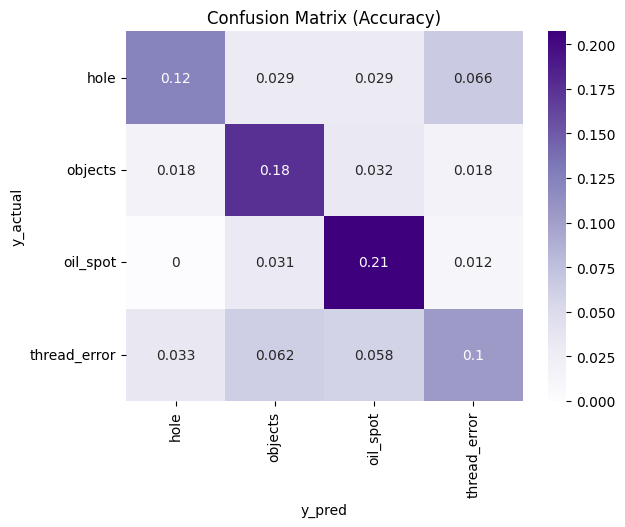


[[0.71030641 0.09811938 0.0896861  0.33128834]
 [0.10027855 0.58871627 0.09865471 0.08834356]
 [0.         0.10466067 0.63378176 0.05889571]
 [0.18941504 0.20850368 0.17787743 0.52147239]]
sum of diagonal = 2.4542768346134944


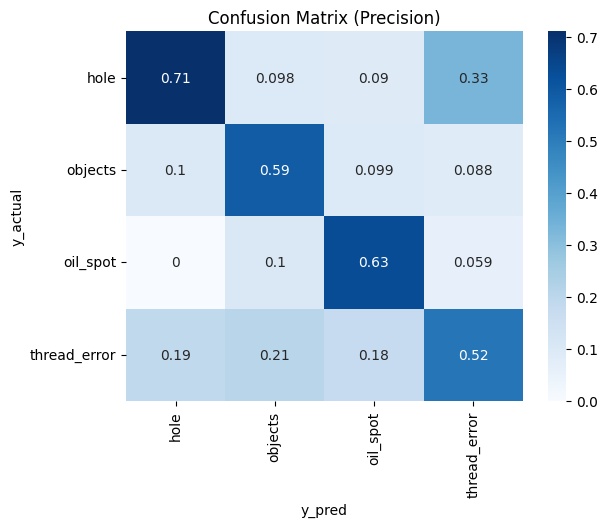


[[0.5        0.11764706 0.11764706 0.26470588]
 [0.07228916 0.72289157 0.13253012 0.07228916]
 [0.         0.125      0.828125   0.046875  ]
 [0.12903226 0.24193548 0.22580645 0.40322581]]
sum of diagonal = 2.4542423727166733


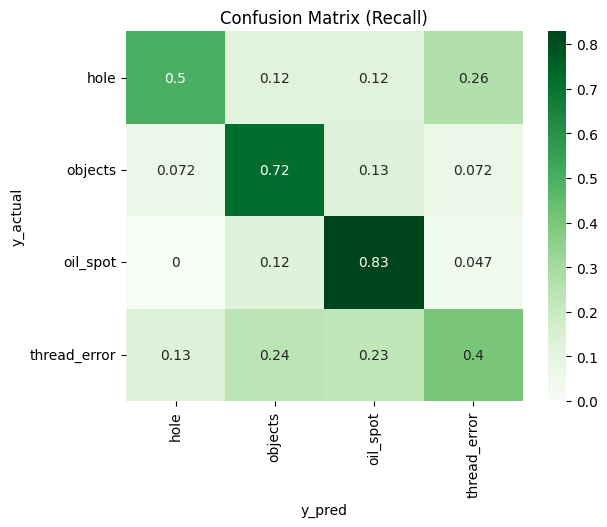

kernel dim = 3x3 number filter = 12, 7x7 number filter = 14
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Finished predicting X.

[[17  5  2 10]
 [ 1 61 16  6]
 [ 2  8 49  4]
 [10 17 12 23]]
sum of diagonal = 150


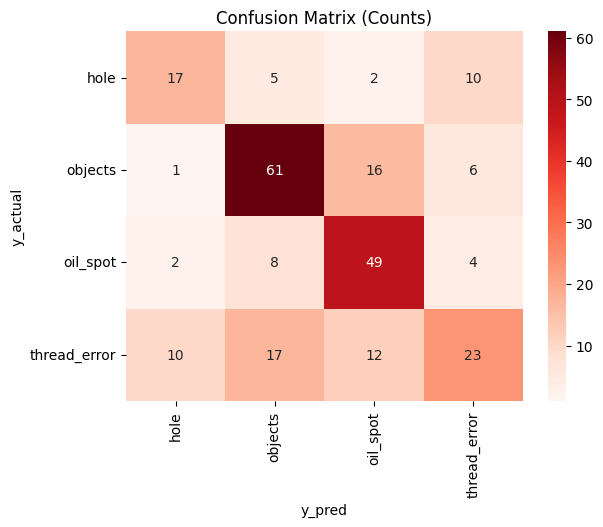


[[0.06995885 0.02057613 0.00823045 0.04115226]
 [0.00411523 0.25102881 0.06584362 0.02469136]
 [0.00823045 0.03292181 0.20164609 0.01646091]
 [0.04115226 0.06995885 0.04938272 0.09465021]]
sum of diagonal = 0.617283950617284


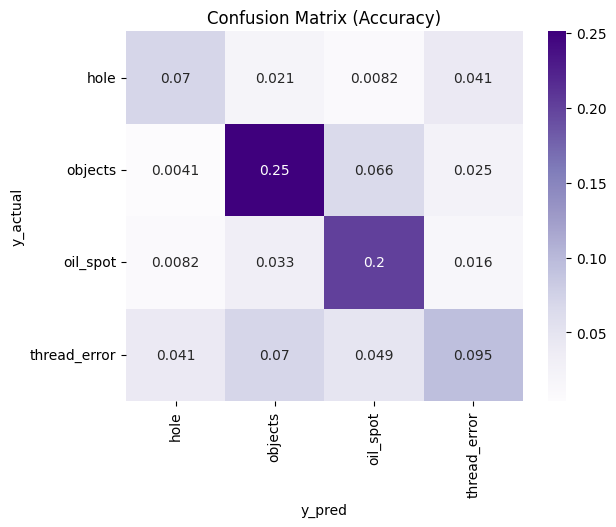


[[0.56666667 0.05494505 0.02531646 0.23255814]
 [0.03333333 0.67032967 0.20253165 0.13953488]
 [0.06666667 0.08791209 0.62025316 0.09302326]
 [0.33333333 0.18681319 0.15189873 0.53488372]]
sum of diagonal = 2.3921332224835314


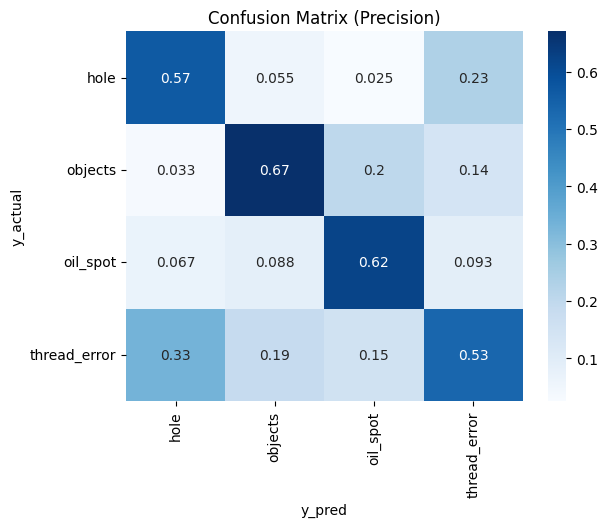


[[0.5        0.14705882 0.05882353 0.29411765]
 [0.01190476 0.72619048 0.19047619 0.07142857]
 [0.03174603 0.12698413 0.77777778 0.06349206]
 [0.16129032 0.27419355 0.19354839 0.37096774]]
sum of diagonal = 2.374935995903738


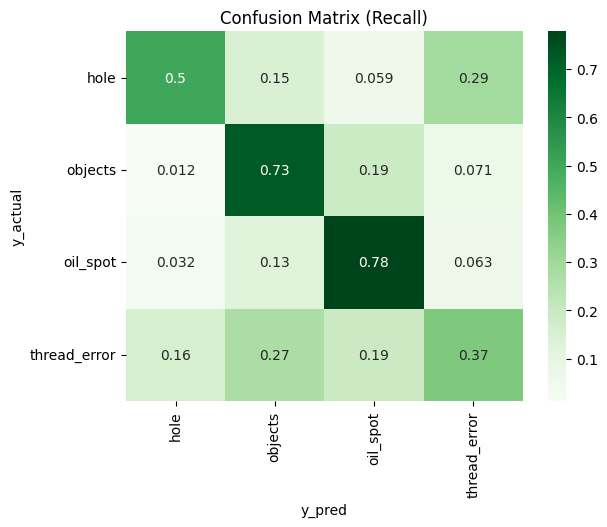

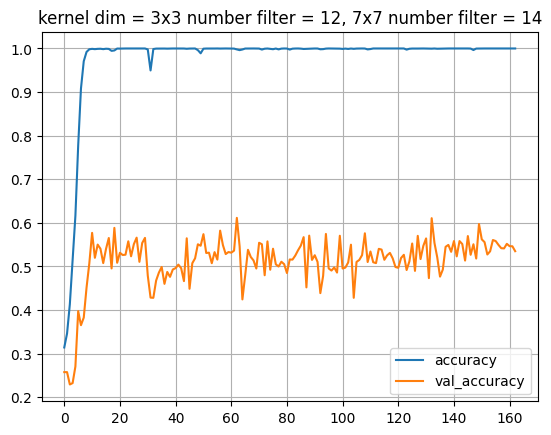

NEW MODEL
kernel dim = 3x3 number kernels = 12, 7x7 number kernels = 16
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 857,688 (3.27 MB)

 Trainable params: 857,240 (3.27 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 105s 649ms/step - accuracy: 0.3013 - loss: 1.8753e-04 - val_accuracy: 0.2433 - val_loss: 10.9592
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 645ms/step - accuracy: 0.3522 - loss: 1.2802e-04 - val_accuracy: 0.2421 - val_loss: 3.9472
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 643ms/step - accuracy: 0.4004 - loss: 1.1780e-04 - val_accuracy: 0.2435 - val_loss: 2.9182
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 102s 641ms/step - accuracy: 0.5095 - loss: 1.0418e-04 - val_accuracy: 0.2215 - val_loss: 2.5895
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 644ms/step - accuracy: 0.6137 - loss: 8.2470e-05 - val_accuracy: 0.3214 - val_loss: 2.6236
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 643ms/step - accuracy: 0.7860 - loss: 5.0739e-05 - val_accuracy: 0.3481 - val_loss: 3.4945
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 642ms/step - accuracy: 0.9157 - loss: 2.4264e-05 - val_accuracy: 0.3478 - val_loss: 4.2382
Epoch 8/100000

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64,    │        120 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32,    │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      2,616 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 2,572,170 (9.81 MB)

 Trainable params: 857,240 (3.27 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,714,482 (6.54 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Finished predicting X with eval data set.

[[630 180  90 120]
 [ 24 744 156  72]
 [  0 176 720 128]
 [119 238 187 510]]
sum of diagonal = 2604


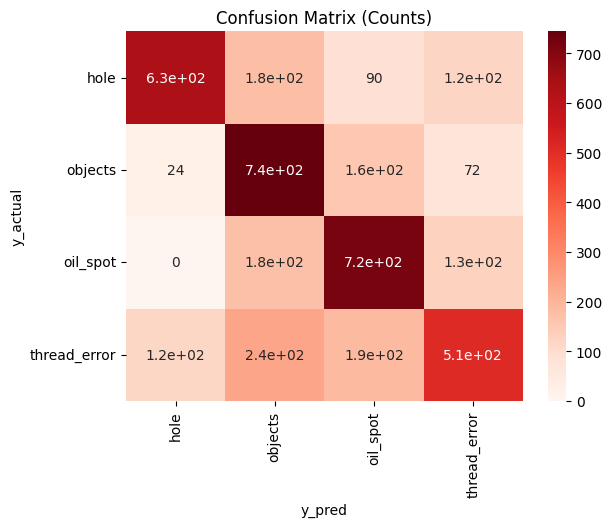


[[0.15388373 0.04396678 0.02198339 0.02931119]
 [0.00586224 0.18172936 0.03810454 0.01758671]
 [0.         0.04298974 0.17586712 0.03126527]
 [0.02906693 0.05813385 0.0456766  0.12457255]]
sum of diagonal = 0.6360527601367856


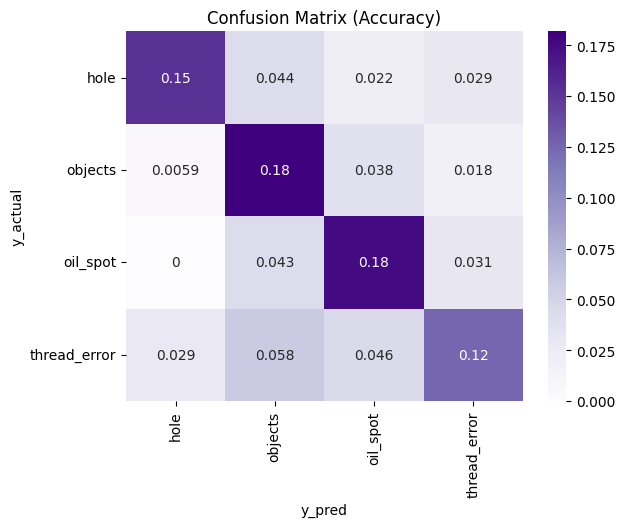


[[0.81500647 0.13452915 0.07805724 0.14457831]
 [0.03104787 0.55605381 0.13529922 0.08674699]
 [0.         0.13153961 0.62445794 0.15421687]
 [0.15394567 0.17787743 0.1621856  0.61445783]]
sum of diagonal = 2.609976047109399


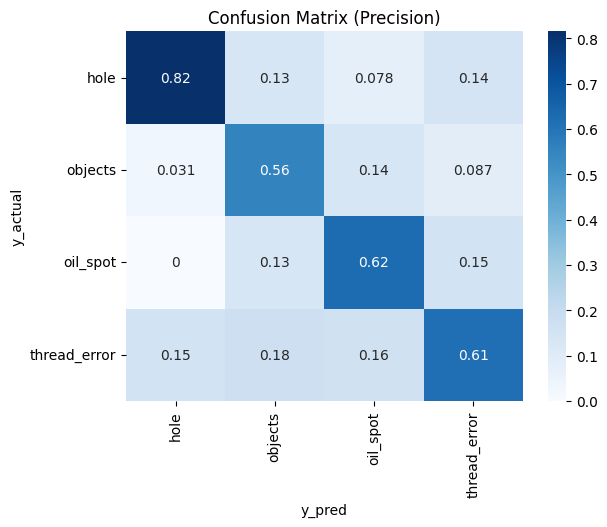


[[0.61764706 0.17647059 0.08823529 0.11764706]
 [0.02409639 0.74698795 0.15662651 0.07228916]
 [0.         0.171875   0.703125   0.125     ]
 [0.11290323 0.22580645 0.17741935 0.48387097]]
sum of diagonal = 2.551630978372694


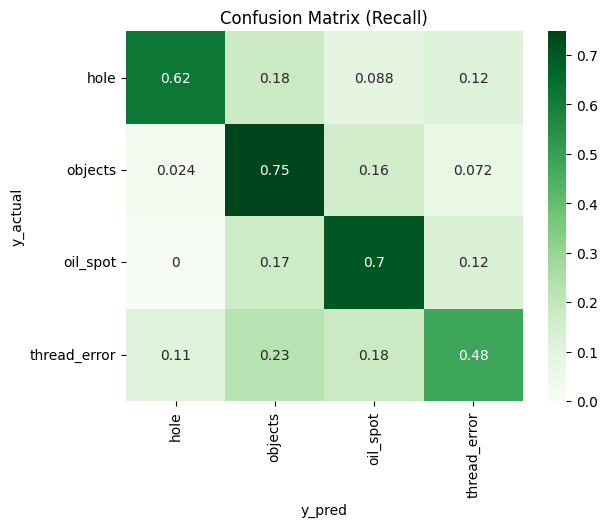

kernel dim = 3x3 number filter = 12, 7x7 number filter = 16
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Finished predicting X.

[[16  7  4  7]
 [ 2 66 13  3]
 [ 1 11 46  5]
 [11 14 13 24]]
sum of diagonal = 152


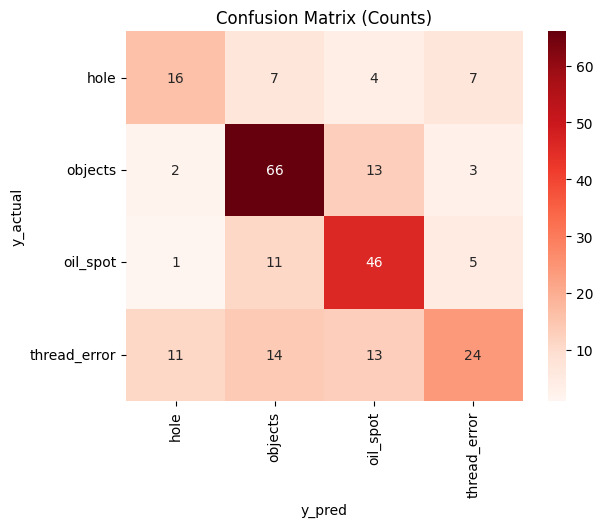


[[0.06584362 0.02880658 0.01646091 0.02880658]
 [0.00823045 0.27160494 0.05349794 0.01234568]
 [0.00411523 0.04526749 0.18930041 0.02057613]
 [0.04526749 0.05761317 0.05349794 0.09876543]]
sum of diagonal = 0.6255144032921811


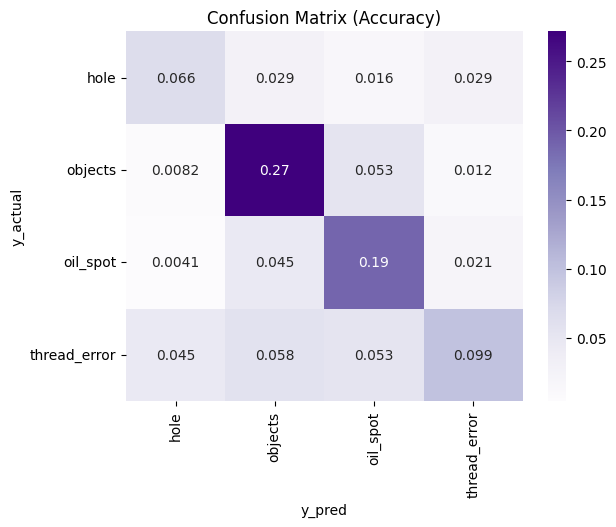


[[0.53333333 0.07142857 0.05263158 0.17948718]
 [0.06666667 0.67346939 0.17105263 0.07692308]
 [0.03333333 0.1122449  0.60526316 0.12820513]
 [0.36666667 0.14285714 0.17105263 0.61538462]]
sum of diagonal = 2.4274504943677875


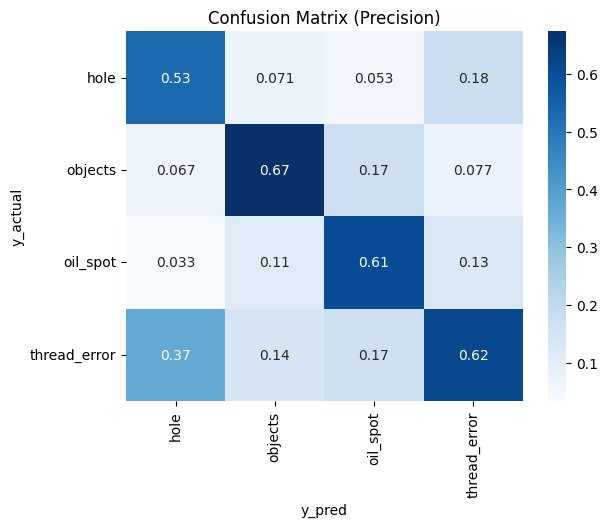


[[0.47058824 0.20588235 0.11764706 0.20588235]
 [0.02380952 0.78571429 0.1547619  0.03571429]
 [0.01587302 0.17460317 0.73015873 0.07936508]
 [0.17741935 0.22580645 0.20967742 0.38709677]]
sum of diagonal = 2.373558025360682


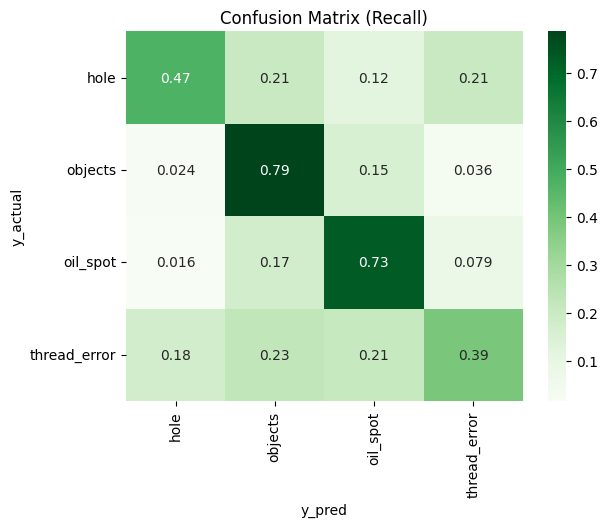

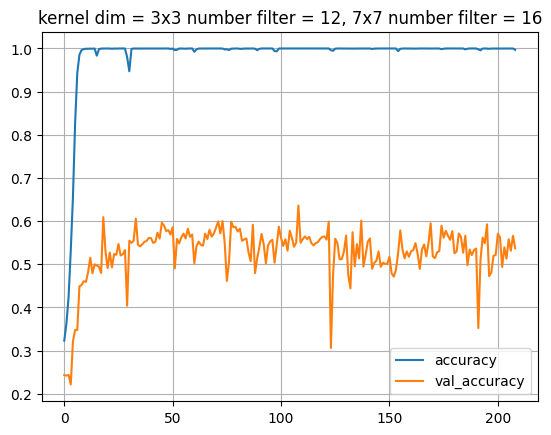

In [8]:
for num_filters_size_3 in [12]:
    for num_filters_size_7 in [6, 8, 10, 12,14,16]:
        dim = [3, 7]
        nums_filters = [num_filters_size_3, num_filters_size_7]
        print('NEW MODEL')
        print(f'kernel dim = 3x3 number kernels = {num_filters_size_3}, 7x7 number kernels = {num_filters_size_7}')
        image_model = CNN_model(kernel_dims = dim, dropout=0.1,  nums_filters = nums_filters, patience = 100, lr = 0.001, num_classes = 4)
        history, image_learner = image_model.fit( features_train_defect_array[:,:,:,0], labels_defect_train, 
                                                 features_eval_defect_array[:,:,:,0], labels_defect_eval, label_dict, batch_size = 256,
                                                 verbose = 'auto', class_weight=class_weights)

        # Test with holdout (test) data set and display confusion matrices.
        print(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        y_predict, y_prob = image_model.predict(features_test_defect_array[:,:,:,0], labels_defect_test,)
        plt.title(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        metric = 'accuracy'
        plt.plot(history.history[metric], label = metric)
        metric = 'val_accuracy'
        plt.plot(history.history[metric], label = metric)
        plt.legend()
        plt.grid()
        plt.show()
        # Save model
        with gzip.open(f"../data/models/defect_identification/models/DefID_y_prob_{str(dim)}_{str(nums_filters)}_{today}.pckl", 'wb') as f:
            pickle.dump(y_prob, f)
        with gzip.open(f"../data/models/defect_identification/models/DefID_image_model_{str(dim)}_{str(nums_filters)}_{today}.pckl", 'wb') as f:
            pickle.dump(image_model, f)
        with gzip.open(f"../data/models/defect_identification/models/DefID_image_learner_{str(dim)}_{str(nums_filters)}_{today}.pckl", 'wb') as f:
            pickle.dump(image_learner, f)
        with gzip.open(f"../data/models/defect_identification/models/DefID_history_{str(dim)}_{str(nums_filters)}_{today}.pckl", 'wb') as f:
            pickle.dump(history, f)